# $$\textbf{Computational Statistics}$$
## $$\textbf{TP2: Expectation-Maximization algorithm - Importance sampling}$$
$$ \textbf{Boubacar Sow, boubacar.sow@ens-paris-saclay.fr}
$$

### $\textbf{Exercice 1: Discrete distributions}$
Let $n \in \mathbb{N}^*$ and $X = \{x_1,...,x_n\}$ a set of n distinct real numbers. Let $(p_i)_{i \in [1,n]}$ a sequence of real numbers such that: 

$$ \forall i \in [1, n], p_i > 0 \text{ and } \sum_{i=1}^n p_i = 1$$

**1.  Explain how to generate a random variable $X $ having the discrete distribution on $X$ given by $(p_i)_{i \in [1,n]}$:<br><br>**
$$ \boldsymbol{\forall i \in [1,n], P(X = x_i ) = p_i}$$ 

<font color = 'blue'> We can use the **Inverse transform sampling** method to do that. Here is how we proceed:
- Create a cumulative distribution function (CDF): <br> Given the probabilities $(p_i)_{i \in [1,n]}$, we create a CDF. The CDF is a sequence $(p_i)_{i \in [1,n]}$ where $P_i = p_1 +...+ p_i$. Note that $P_n = 1$ since the sum of all probabilities equals 1.
- Generate a uniform random number $u \in [0, 1]$
- Find the smallest $i$ such that $u \leq P_i$. The $x_i$ being the realization of the random variable X.

Mathematically, we have: 
$$\begin{aligned} F^{-1} : 
& ]0,1[ \rightarrow X \\
& u \rightarrow \text{inf} \{x \in \mathbb{R}: F(x) \geq u\} 
\end{aligned}$$
with $u \sim U([0, 1])$, then we have $X = F^{-1}(u)$

**2. Python code for the algorithm described above**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math

def generate_random_variable(X, p):
    
    CDF = np.cumsum(p)
    U = np.random.uniform()
    index = np.argmax(CDF > U)
    return X[index]


**3. Generate a sequence of $(X_i)_{i\in [1, N]}$ of $i.i.d$ random variables having the same distribution as $X$ for large values of $N$. Compare the empirical distribution to the theoritical distribution of $X$**

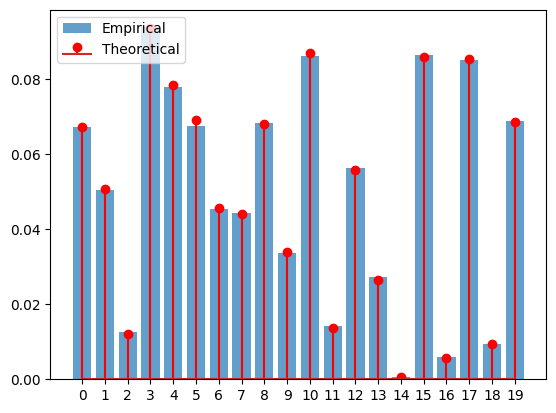

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Number of random variables
num_vars = 20

X = range(num_vars)
rands = np.random.random(num_vars)
p = rands / sum(rands)
random_sequence = [generate_random_variable(X, p) for _ in range(100000)]

# Compare the empirical distribution to the theoretical distribution
plt.hist(random_sequence, bins=np.arange(0, num_vars+1)-0.5, density=True, rwidth=0.8, align='mid', alpha=0.7, label='Empirical')
plt.stem(X, p, linefmt='r-', markerfmt='ro', label='Theoretical')
plt.xticks(X)
plt.legend()
plt.show()


**Comments**: We can observe a small difference between empirical and theoritical distributions. However, when we increase the sample size ie. the size of the random sequence, this difference decreases and the empiracal distribution tends to be equal to the theoritical distribution. This is a consequence of the low of large numbers.

### $\textbf{Exercice 2: Gaussian mixture model and the EM algorithm}$
Let consider a n-sample. For each individual, we observe a random variable $X_i$ and assume there is
an unobserved variable $Z_i$ for each person which encodes the class of $X_i$. More formally, we consider a mixture of $m$ Gaussians: let $(\alpha_1,...,\alpha_m) \in \mathbb{R}_+^m$ such that $\sum_{i=1}^m \alpha_i = 1 $ and the following hierarchical model:

$$\forall i \in [1,n], \forall j \in [1,m], \mathbb{P}_\theta(Z_i = j) = \alpha_j $$
and 
$$\forall i \in [1,n], \forall j \in [1,m], X_i | \theta, \{ Z_i = j \} \sim \mathcal{N} (\mu_j,\Sigma_j) $$
Unless otherwise stated, we assume that p is fixed

**1. Identify the parameters, denoted $\theta$ of the model defined above, the corresponding probability density function $p_\theta(x)$ for any observation $x$. And write down the likelihood of $\theta$ given the outcomes $(x_i)_{i \in [1,n]}$**<br>
<font color = 'blue'> The parameters are $$\theta = (\alpha_{1},\alpha_{2},...,\alpha_{m},\mu_{1},...,\mu_{m},\Sigma_{1},...,\Sigma_{m}) = \{(\alpha_j, \mu_j, \Sigma_j) \mid j \in [1, p]\}$$
- The mixing coefficients $(\alpha_{1},\alpha_{2},...,\alpha_{m})$ represent the probabilities of each Gaussian component
- The means $(\mu{1},\mu{2},...,\mu{p})$ of each gaussian
- The covariance matrices $(\Sigma{1},\Sigma{2},...,\Sigma_{p})$ of each Gaussian component

The probability density function $p_{\theta}(x)$ for any observation $x$ under this model is a weighted sum of the $p$ Gaussian densities:
$$p_{\theta}(x) = \sum_{j=1}^{p} \alpha_j \frac{1}{(2\pi)^{d/2} |\Sigma_j|^{1/2}} \exp\left(-\frac{1}{2} (x-\mu_j)^T \Sigma_j^{-1} (x-\mu_j)\right)$$
where $d$ is the dimension of the data, $|\Sigma_j|$ is the determinant of the covariance matrix $\Sigma_j$, and $(x-\mu_j)^T \Sigma_j^{-1} (x-\mu_j)$ is the Mahalanobis distance of $x$ from the mean $\mu_j$.

The likelihood of $\theta$ given the outcomes $(x_i)_{i\in[1,n]}$ of the i.i.d n-sample $(X_i)_{i\in[1,n]}$ is defined by:
$$\begin{aligned}
\mathcal{L}(x_1,...,x_n ; \theta) & = \prod_{i = 1}^n p_\theta (x_i) \\
& = \prod_{i = 1}^n \sum_{j = 1 }^m p_\theta (x_i | z_i = j) p(z_i = j) \\ 
% & = \prod_{i = 1}^n \sum_{j = 1 }^m  \alpha_j \phi(x_i , \mu_j , \Sigma_j) \\
&=  \prod_{i = 1}^n \sum_{j = 1 }^m  \alpha_j \frac{1}{(2\pi)^{d/2} |\Sigma_j|^{1/2}} \exp\left(-\frac{1}{2} (x-\mu_j)^T \Sigma_j^{-1} (x-\mu_j)\right)
\end{aligned}
$$



**2. Sample a set of observation according to a Gaussian mixture law, with the parameters of your choice. Use the hierarchical model and the first exercise.**

In [60]:
def generate_spd_matrices(j):
    """Generate j symmetric positive-definite matrices."""
    matrices = []
    for _ in range(j):
        A = np.random.randn(2, 2)
        B = np.dot(A, A.transpose())
        matrices.append(B)
    return matrices


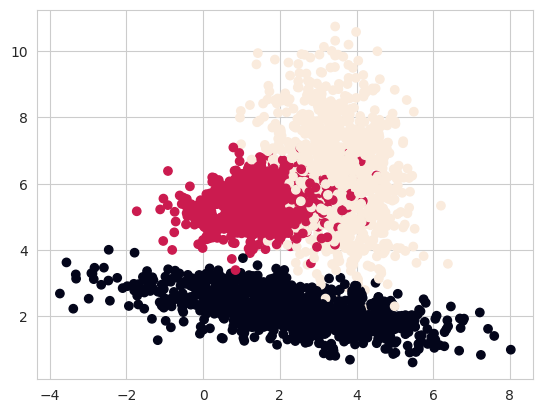

In [87]:
# Parameteters of the distribution
n=3000
j = 3
mu = np.random.rand(j, 2) * 7
alpha = np.ones(j) / j
sigmas = generate_spd_matrices(j)
random_sequence = []
for _ in range(n):
    random_sequence.append(generate_random_variable(range(n), alpha))

gaussian_mixture = []
label = []
for sample in random_sequence:
    gaussian_mixture.append(np.random.multivariate_normal(mu[sample], sigmas[sample]))
    label.append(sample)

plt.scatter(np.array(gaussian_mixture)[:, 0], np.array(gaussian_mixture)[:, 1], c=label)

In [88]:
print("Theoretical mean: ", mu)
print("Theoretical covariance matrices: ", sigmas)
print("Theoretical weights: ", alpha)

Theoretical mean:  [[2.36954427 2.20704965]
 [1.58283476 5.36043485]
 [3.50828321 6.35247305]]
Theoretical covariance matrices:  [array([[ 3.44461348, -0.55133031],
       [-0.55133031,  0.29081916]]), array([[0.92520008, 0.09576079],
       [0.09576079, 0.29770239]]), array([[ 0.81638914, -0.34993868],
       [-0.34993868,  2.47084828]])]
Theoretical weights:  [0.33333333 0.33333333 0.33333333]


**3. Implement the EM algorithm in order to estimate the parameters of this model from your observations and plot the log-likelihood over the number of iterations of the algorithm**

In [71]:
def random_initialization(points, j):
    """Randomly initialize the parameters of the Gaussian mixture."""
    mu = np.random.rand(j, 2) * 5
    alpha = np.ones(j) / j
    sigmas = generate_spd_matrices(j)
    return mu, sigmas, alpha

def e_step(points, mu, sigma, alpha, j):
    """Compute the responsibilities of each Gaussian for each sample."""
    n = len(points)
    responsibilities = np.zeros((n, j))
    for i in range(j):
        responsibilities[:, i] = alpha[i] * scipy.stats.multivariate_normal.pdf(points, mu[i], sigma[i], allow_singular=True) + 1e-6
    responsibilities /= responsibilities.sum(axis=1, keepdims=True)
    return responsibilities + 1e-6

def m_step(points, responsibilities, j, sigma, mu, alpha):
    """Update the parameters of the Gaussian mixture."""
    for i in range(j):
        resp_sum = np.sum(responsibilities[:, i])
        mu[i] = np.dot(responsibilities[:, i], points) / resp_sum + 1e-6
        sigma[i] = (responsibilities[:, i]* (points - mu[i]).T @ (points - mu[i])) / resp_sum + 1e-6
    alpha = np.sum(responsibilities, axis=0) / len(points)   
    return mu, sigma, alpha

def exp_log_likelihood(points, mu, sigma, alpha, j):
    """Compute the expectation of the log-likelihood."""
    log_likelihood = np.sum(np.log(np.sum(1e-6+np.array([alpha[k] * scipy.stats.multivariate_normal.pdf(points, mu[k], sigma[k], allow_singular=True) for k in range(j)]), axis=0) + 1e-6))
    return log_likelihood

def EM(points, j, max_iter=80, tol=1e-3):
    """Expectation-Maximization algorithm."""
    mu, sigma, alpha = random_initialization(points, j)
    log_likelihoods = []
    old_log_likelihood = -np.inf  # Initialize to negative infinity
    for _ in range(max_iter):
        responsibilities = e_step(points, mu, sigma, alpha, j)
        mu, sigma, alpha = m_step(points, responsibilities, j, sigma, mu, alpha)
        new_log_likelihood = exp_log_likelihood(points, mu, sigma, alpha, j)
        log_likelihoods.append(new_log_likelihood)
        # Check for convergence
        if np.abs(new_log_likelihood - old_log_likelihood) < tol:
            break
        old_log_likelihood = new_log_likelihood
    return mu, sigma, alpha, log_likelihoods


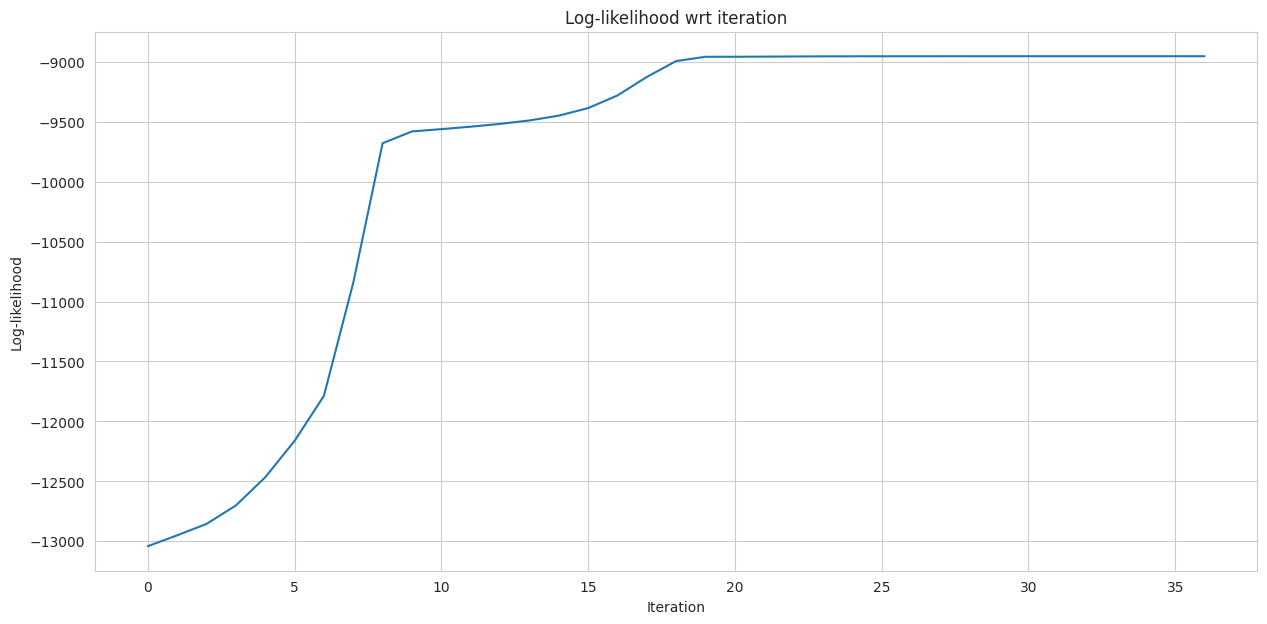

In [85]:
j = 3
n = 2000
mu, sigma, alpha, log_likelihoods = EM(gaussian_mixture, j)

# Plot the results 
plt.figure(figsize=(15,7))
plt.plot(log_likelihoods)
plt.title('Log-likelihood wrt iteration')
plt.xlabel('Iteration')
plt.ylabel('Log-likelihood')
plt.show()

In [86]:
print("Estimated mean: ", mu)
print("Estimated covariance matrices: ", sigma)
print("Estimated weights: ", alpha)

Estimated mean:  [[5.09674471 6.1002341 ]
 [2.37336216 1.48897065]
 [6.22638146 2.91477667]]
Estimated covariance matrices:  [array([[ 1.04350829, -0.5732377 ],
       [-0.5732377 ,  1.04347781]]), array([[ 2.87337992, -2.08600565],
       [-2.08600565,  1.53764386]]), array([[ 0.96802833, -0.73507305],
       [-0.73507305,  0.6716182 ]])]
Estimated weights:  [0.33315684 0.34103265 0.32581351]


**Comments**: <font color = 'blue'>The estimated are very close to the theoritical weights computed above. We can thus conclude that the algorithm converges to the optimal solution.

**Application: Credue Birth/Death Rate**

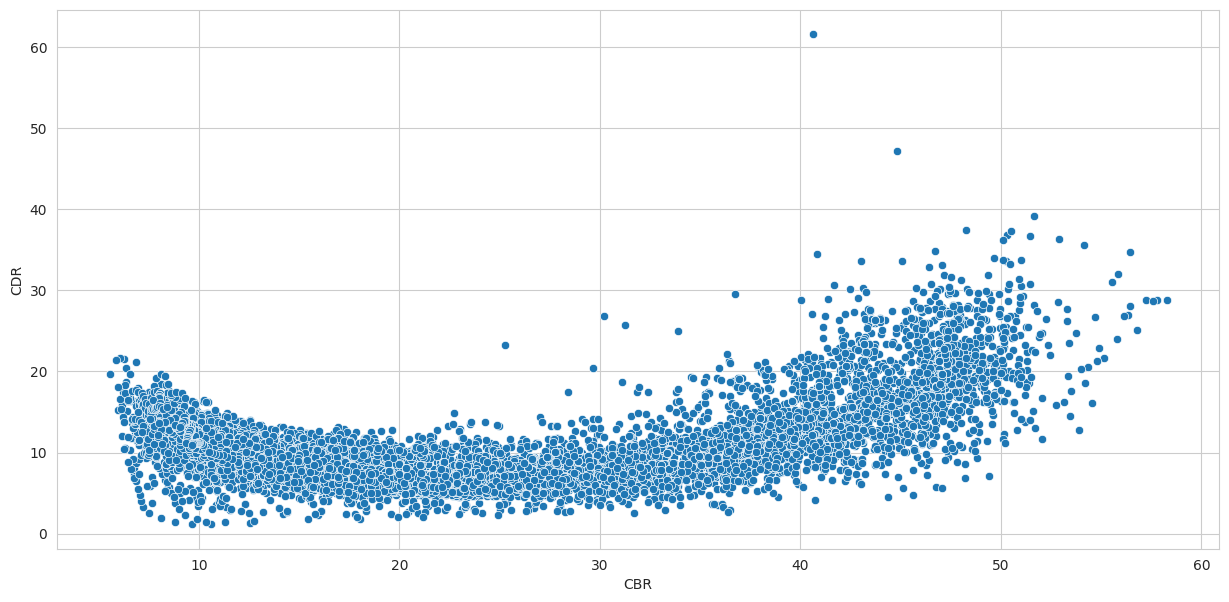

In [77]:
data = pd.read_csv('WPP2019_Period_Indicators_Medium.csv')[['CBR','CDR']].dropna()

# Scatter plot, style grid
plt.figure(figsize=(15,7))
sns.set_style("whitegrid")
sns.scatterplot(x="CBR", y="CDR", data=data)
plt.show()

**Comments**: <font color = 'blue'>No specific clusters in the data

**6. Estimate the parameters $\theta$ for different values of m, try to interpret them and compute the BIC. Plot the corresponding pdf over the scatter plot. Usage of plt.contour**


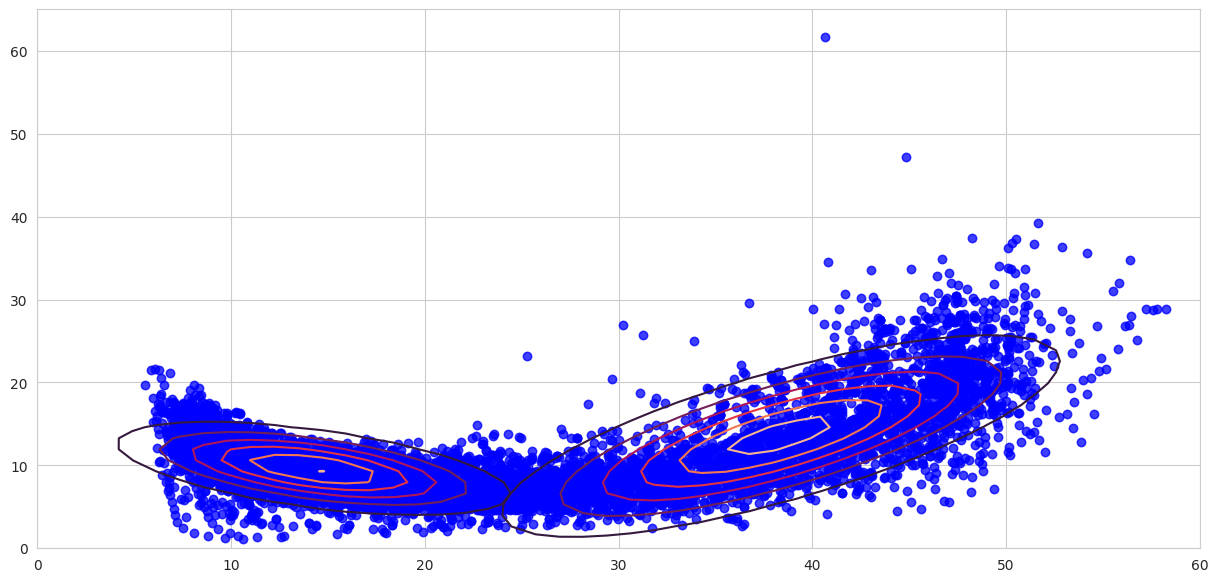

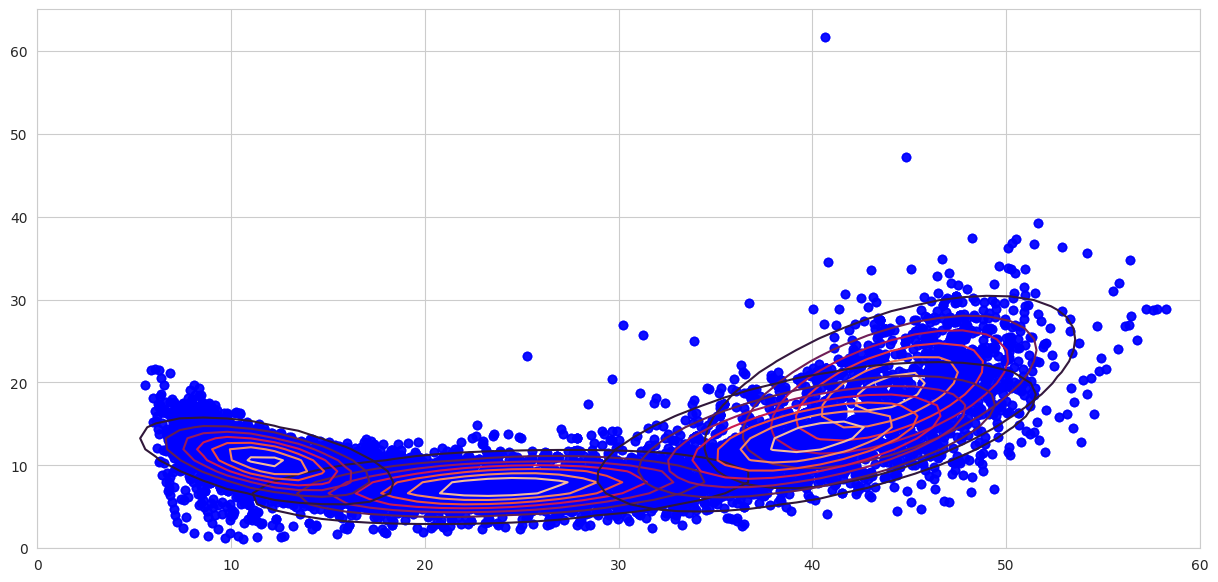

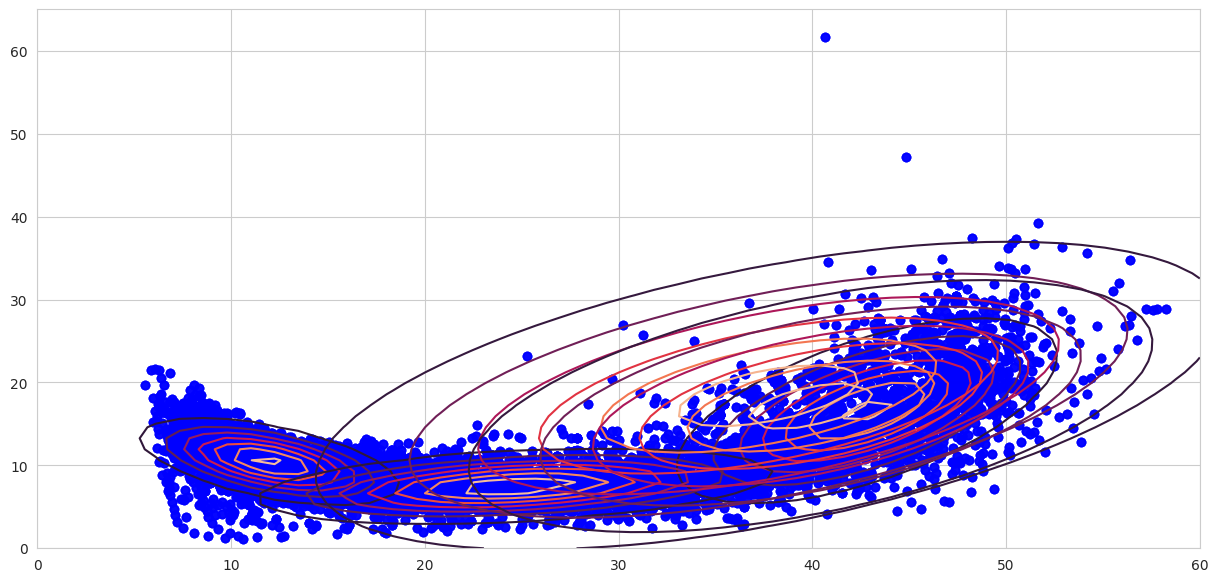

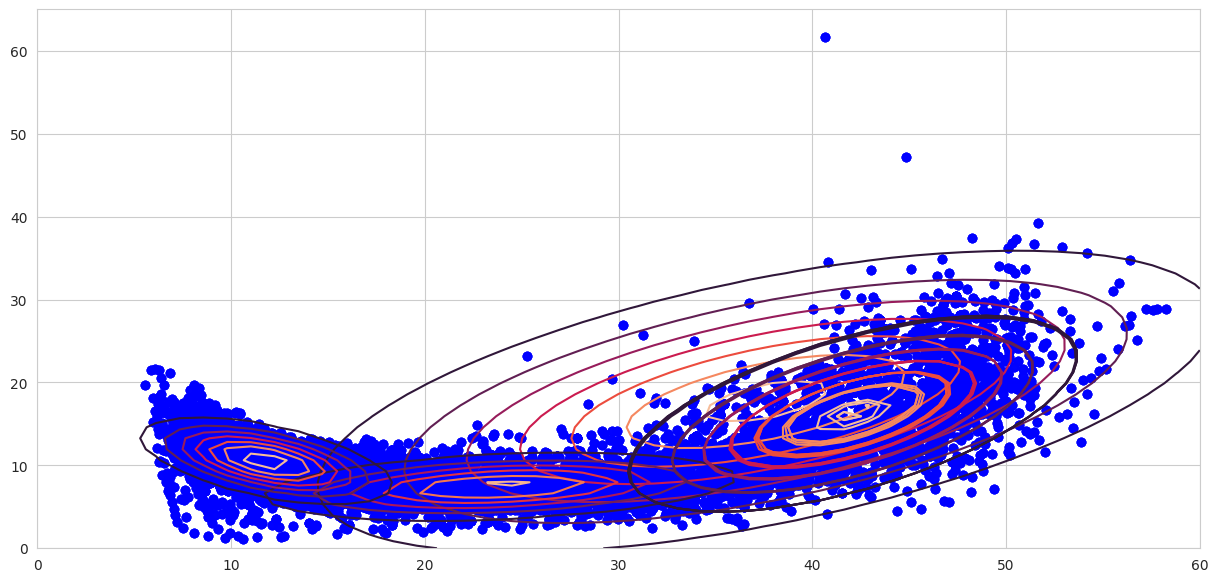

In [84]:
m = [2, 4, 5, 7] # number of clusters
def plot_gaussian(X, mu, sigma, k, color='r'):
    """Plot a Gaussian distribution."""
    plt.figure(figsize=(15,7))
    x = np.linspace(0, 60)
    y = np.linspace(0, 65)
    V, W = np.meshgrid(x, y)
    
    for i in range(k):
        pos = np.empty(V.shape + (2,))
        pos[:, :, 0] = V
        pos[:, :, 1] = W
        plt.scatter(X[:, 0], X[:, 1], c='blue', alpha=0.5) 
        plt.contour(V, W, scipy.stats.multivariate_normal.pdf(pos, mu[i], sigma[i]))

X = data.values

for i in m:
    mu, sigma, alpha, log_likelihoods = EM(X, i)
    plot_gaussian(X, mu, sigma, i)

The best number of clusters is : 7


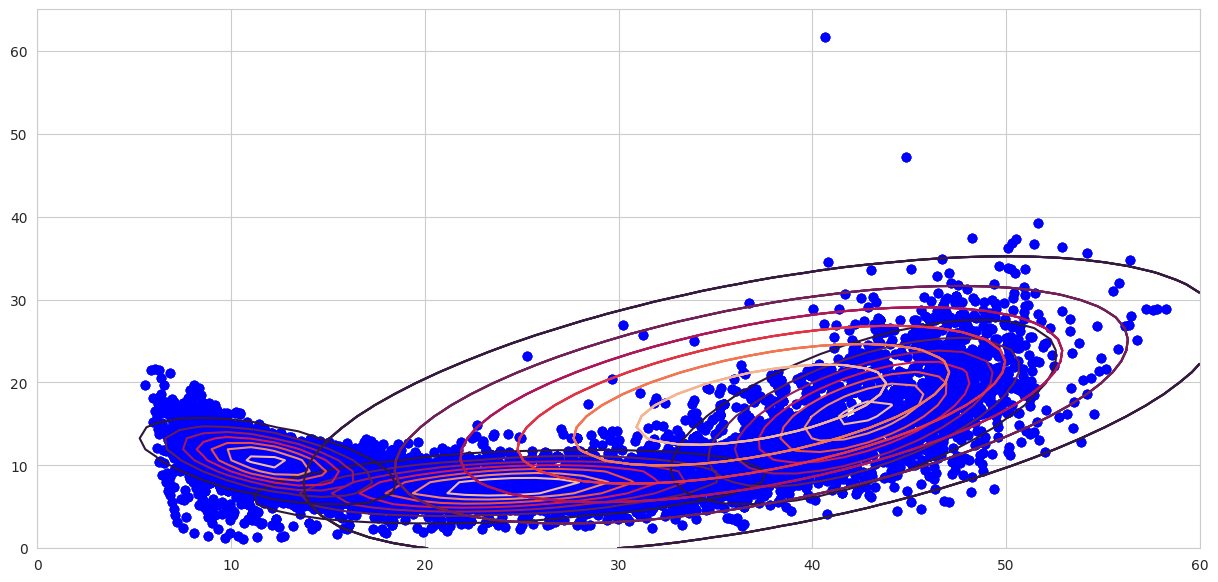

In [92]:
def df(p):
    """Return the number of parameters of the Gaussian mixture."""
    return 6 * p - 1
# Use the BIC estimator 
BICs = [] 
mu_list = []
sigma_list =[] 

for i in m: 
    
    mu, sigma, alpha, log_likelihood = EM(X, i)
    BICs.append( - log_likelihood[-1] + 0.5 * df(i) * np.log(n))
    mu_list.append(mu)
    sigma_list.append(sigma)
    
p = np.argmin(BICs)
best_nb_clusters = m[p]
print('The best number of clusters is :' , best_nb_clusters )
plot_gaussian(X,mu_list[p],sigma_list[p], best_nb_clusters)

### $\textbf{Exercice 3: Importance sampling}$
Let $p$ be a density on $\mathbb{R}^d$, $d \in \mathbb{N}^*$. Importance sampling aims at evaluating
$$\mathbb{E}_p[g(X)] = \int g(x)p(x)dx$$
Objective Classical Monte Carlo integration requires to generate i.i.d. random variables $(X_1, . . . , X_n)$
from $p$ in order to approximate $E_p [g(X)]$ by $\frac{1}{n} \sum_{i=1}^{n} g(X_i)$. Sampling from other distributions than
the original distribution $p$ can improve the variance of the estimator and reduce the number of samples
needed.

Importance sampling is based on the following fundamental equality
$$E_p [g(X)] = \int g(x)p(x) dx = \int \frac{g(x) p(x)}{q(x)} q(x) dx = E_q \left[\frac{g(X) p(X)}{q(X)}\right]$$
which holds for any density $q$ such that $\text{Supp}(g \times p) \subset \text{Supp}(q)$. The density $q$ is called importance
density. If $(X_1, . . . , X_n)$ is a sample from $q$, $E_p [g(X)]$ can therefore be approximated by
$$\frac{1}{n} \sum_{i=1}^{n} \frac{p(X_i)}{q(X_i)} g(X_i) = \frac{1}{n} \sum_{i=1}^{n} \omega_i g(X_i) \text{ with } \omega_i = \frac{p(X_i)}{q(X_i)}$$
The $(\omega_i)_i$ are called importance weights. In Bayesian inference, the density $p$ might be known only up
to a normalizing constant. In this case, $E_p [g(X)]$ can be approximated by
$$\frac{1}{n} \sum_{i=1}^{n} \tilde{\omega}_i g(X_i) \quad \text{where } \quad \tilde{\omega}_i = \frac{\omega_i}{\frac{1}{n} \sum_{j=1}^{n} \omega_j}$$
The $(\tilde{\omega}_i)_i$ are called normalized importance weights and do not depend on the normalizing constant of
$p$. <br> <br>
$\textbf{Importance distribution}$ The performance of Importance Sampling depends on the choice of importance density (or importance function). The "best" importance density $q^*$ is chosen so as to minimize the variance of the related Monte-Carlo estimate:
$$q^* = \underset{q}{\text{argmin}} \, Var_q \left[ \frac{p(X)}{q(X)} g(X) \right], \quad X \sim q(\cdot) \tag{$\star$}\$$ 
It can be shown (see for instance [RK16]) that the optimal density minimizing objective (**(*)**) is given by
$$q^*(x) = \frac{g(x)p(x)}{\int g(y)p(y) dy}$$
however this expression requires the explicit use of $\int g(y)p(y) dy$, **which is the unknown quantity of interest which we are trying to find...**
In order to circumvent this issue, we instead choose $q$ among a parametric family of densities $Q$ and try to find the distribution that best matches with $q^*$. Given a density $q$ on $\mathbb{R}^d$, the approximation is measured in terms of the Kullback-Leibler divergence $K(q^* \parallel q)$ given by <br>
$$K(\nu_1 \parallel \nu_2) = \int \log \left( \frac{\nu_1(x)}{\nu_2(x)} \right) \nu_1(x) dx$$
Therefore, the new problem to be solved to perform efficient Importance Sampling writes as follows:
$$\underset{q \in Q}{\text{argmin}} \, K(q^* \parallel q) \tag{$\star\star$}$$



**3.a - Poor Importance Sampling**

In [94]:
def f(x):
    # x is distributed according to a unnormalized density p that is similar to chi distribution.
    return 2 * np.sin(2 * np.pi * x/3) if x >= 0 else 0

def p(x):
    return x**0.65 * np.exp(-x**2/2) if x >= 0 else 0

def q(x, mu=0.8, sigma=math.sqrt(1.5)):
    return 2 / math.sqrt(2 * math.pi * sigma) * np.exp(-(mu - x)**2 / 3)

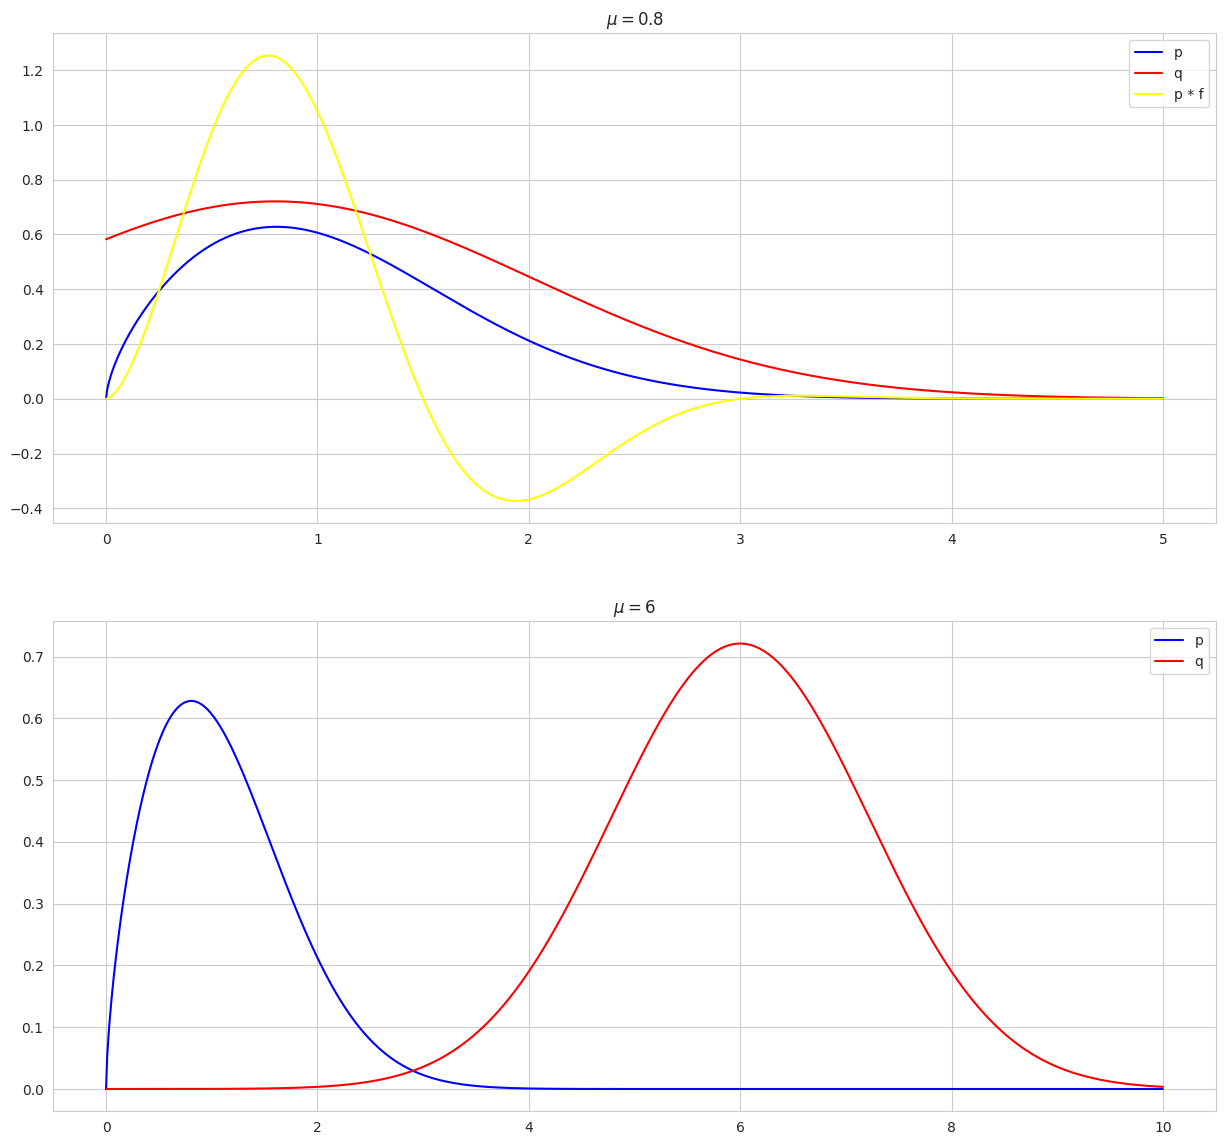

In [97]:
x1 = np.linspace(0, 5, 1000)
x2 = np.linspace(0, 10, 1000)

f_samples = [f(y) for y in x1]
p_samples1 = [p(y) for y in x1]
q_samples1 = [q(y) for y in x1]

p_samples2 = [p(y) for y in x2]
q_samples2 = [q(y, mu=6) for y in x2]

fig, axs = plt.subplots(2, figsize=(15,14))

# Plot the first subplot
axs[0].plot(x1, p_samples1, label='p', color='blue')
axs[0].plot(x1, q_samples1, label='q', color='red')
axs[0].plot(x1, np.array(p_samples1) * np.array(f_samples), label='p * f', color='yellow')
axs[0].legend()
axs[0].set_title(r'$μ = 0.8$')

# Plot the second subplot
axs[1].plot(x2, p_samples2, label='p', color='b')
axs[1].plot(x2, q_samples2, label='q', color='r')
axs[1].legend()
axs[1].set_title(r'$\mu = 6$')

plt.show()

**1. Implement a simple importance sampling procedure for the previous functions**

In [109]:
def importance_sampling(N, mu, sigma):
    """Importance sampling algorithm."""
    samples = []
    count = 0
    while count < N:
        # Sample from q
        x = np.random.normal(mu, sigma)
        # Discard any samples x < 0
        if x < 0:
            continue
        # Store the sample
        samples.append(x)
        count += 1
    samples = sorted(samples)
    p_list = [p(x) for x in samples]
    q_list = [q(x, mu, sigma) for x in samples]
    f_list = [f(x) for x in samples]
    unnorm_weights = [p_list[i] / q_list[i] for i in range(len(samples))]
    norm_weights = unnorm_weights / np.sum(unnorm_weights)
    res = np.sum([norm_weights[i] * f_list[i] for i in range(len(samples))])

    return res, norm_weights*N, unnorm_weights  # Return the estimate and the normalized weights


**2. Compute the mean and the variance of the importance sampling estimate of $\mathbb{E}_p[f (X)]$. You can use several sample sizes, for instance $N = 10, 100, 10^3\text{ and } 10^4$**

N =  10 , sampling =  -0.22384486995723926
sum of weights =  9.999999999999998
N =  100 , sampling =  0.8485871854230113
sum of weights =  99.99999999999999
N =  1000 , sampling =  0.8164577494660805
sum of weights =  1000.0000000000001
N =  10000 , sampling =  0.7531183054201722
sum of weights =  9999.999999999998
N =  100000 , sampling =  0.7740515230827333
sum of weights =  100000.0


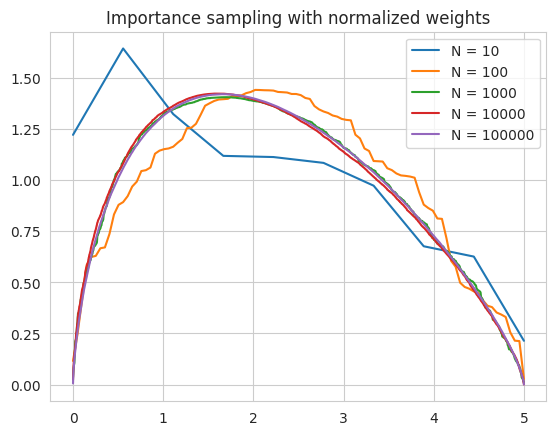

Mean of the importance sampling estimates:  0.5936739786869516
Standard deviation of the importance sampling estimates:  0.4100997369492485


In [113]:
N = [10, 100, 1000, 10000, 100000]
imp_samplings = []
for n in N:
    samplings, weights, unnorm_weights = importance_sampling(n, 0.8, math.sqrt(1.5))
    imp_samplings.append(samplings)
    print("N = ", n, ", sampling = ", samplings)
    print("sum of weights = ", np.sum(weights))
    plt.plot(np.linspace(0,5,len(weights)), weights , label = 'N = ' + str(n))  # Scale the weights by n

plt.title('Importance sampling with normalized weights')
plt.legend()
plt.show()

print("Mean of the importance sampling estimates: ", np.mean(imp_samplings))
print("Standard deviation of the importance sampling estimates: ", np.std(imp_samplings))



**3. Shift the mean of $q$ to $\mu = 6$, so that the centers of mass for each distribution are far apart and repeat the previous experiment. Compare the importance weights for both values of $\mu$.**

N =  10 , sampling =  0.050630402955975165
sum of weights =  10.0
N =  100 , sampling =  0.3250868355617975
sum of weights =  99.99999999999999
N =  1000 , sampling =  -1.7013030611609383
sum of weights =  1000.0000000000001
N =  10000 , sampling =  0.18760841215836277
sum of weights =  9999.999999999996


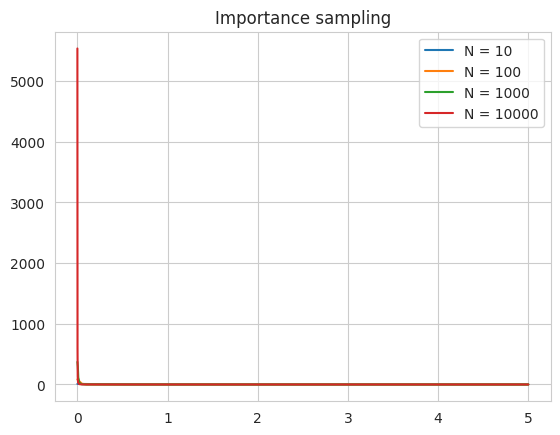

Mean of the importance sampling estimates:  -0.2844943526212007
Standard deviation of the importance sampling estimates:  0.8237301991389239


In [116]:
N = [10, 100, 1000, 10000]
imp_samplings = []
for n in N:
    samplings, weights, unnorm_weights = importance_sampling(n, 6, math.sqrt(1.5))
    imp_samplings.append(samplings)
    print("N = ", n, ", sampling = ", samplings)
    print("sum of weights = ", np.sum(weights))
    plt.plot(np.linspace(0,5,len(weights)), weights , label = 'N = ' + str(n))  # Scale the weights by n

plt.title('Importance sampling')
plt.legend()
plt.show()

print("Mean of the importance sampling estimates: ", np.mean(imp_samplings))
print("Standard deviation of the importance sampling estimates: ", np.std(imp_samplings))



**Comments**: <font color = 'blue'> We have a lot of zeros values for the importance weights. This is expected because when we shift the mean of to $\mu=6$, we are moving the center of the $q$ distribution away of the $p$ distribution. This means that many of the samples we draw from $q$ will have low probability under $p$, resulting in small importance weights. In this case $q$ is not a good mathc for the target distribution $p$

**3.B Adaptive Importance Sampling**
In this section, we show how Importance Sampling can be used to solve problem $(\star\star)$ in a more general setting, where we wish to find the distribution $q^*$ best approximating a distribution $\nu$:
$$q^* = \underset{q \in Q}{\text{argmin}} \, K(\nu || q) . \tag{$\star\star'$}$$
In the following, we choose $Q$ to be the family of mixtures of $K$ Gaussian distributions on $\mathbb{R}^d$, and denote by $\theta$ their parameter. An element of $q_\theta \in Q$ is of the form
$$q_\theta (x) = \sum_{i=1}^{K} \alpha_i \phi(x; \mu_i, \Sigma_i)$$
where, for all $i \in J1, K K$, $\alpha_i > 0$, $\sum_{i=1}^{K} \alpha_i = 1$ and $\phi(·; \mu_i, \Sigma_i)$ is a Gaussian distribution with mean $\mu_i$ and covariance $\Sigma_i$. Because the family $Q$ is a parametric family of distributions, the optimization problem $(\star\star')$ can be rewritten as
$$\text{Find } \theta^* = \underset{\theta=(\alpha_i,\mu_i,\Sigma_i)_{1 \leq i \leq K}}{\text{argmax}} \, E_\nu [\log q_\theta (X)] = \underset{\theta=(\alpha_i,\mu_i,\Sigma_i)_{1 \leq i \leq K}}{\text{argmax}} \, E_{q_\theta} \left[ \frac{\nu(x)}{q_\theta (X)} \log q_\theta (X) \right] . \tag{$\star \star \star$}$$
The solution to $(\star \star \star)$ cannot always be obtained in closed-form due to the density $\nu$ which makes the exact computation impossible. The Population Monte Carlo algorithm described at page 6 is a method which aims at approximating this solution $\theta^*$.

$\textit{Remark.}$ In practice, the Population Monte Carlo algorithm allows solving problem $(\star\star)$ by computing a parametrized distribution $q_{\theta^*}$ which approximates the distribution proportional to $pg$. Then, we can compute the expectation of interest $E_p[g(X)]$ using $q_{\theta^*}$ as the importance distribution.


**Explain how the EM algorithm can be used to maximize the empirical criterion in step (iii) of the algorithm on page 6. Derive the parameters update.** <font color = 'blue'>
The difference with the log-likelihood we had to maximize in the EM algorithm is that now he have the weights, ie. $\sum_{i=1}^n \tilde{w}_i^{(t)}\log q_\theta(x_i^{(t)})$
This results in a change in the way the parameters are updated. The new updates rule are:
$$\hat{\alpha}_j = \frac{1}{n}\sum_{i=1}^n \tilde{w}_i \tau_{ij}$$
$$\hat{\mu}_j = \frac{\sum_{i=1}^n \tilde{w}_i \tau_{ij} x_i}{\sum_{i=1}^n \tilde{w}_i \tau_{ij}}$$
$$\hat{\Sigma}_j = \frac{\sum_{i=1}^n \tilde{w}_i \tau_{ij}(x_i - \mu_j)(x_i - \mu_j)^T}{\sum_{i=1}^n \tilde{w}_i \tau_{ij}}$$
We can thus simply apply EM algorithm with these new update rules


**3.C – Application to a "banana"-shaped density**

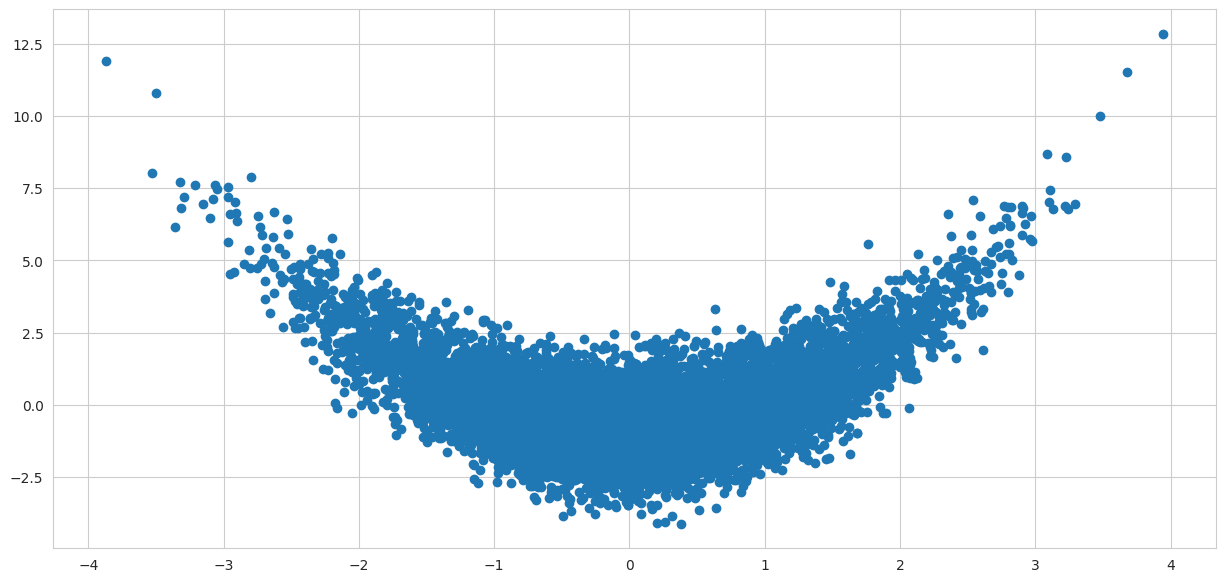

In [118]:
def banana_density(d, sigma, b, n):
    covariance_matrix = np.eye(d)
    covariance_matrix[0, 0] = sigma**2
    
    samples = np.random.multivariate_normal(np.zeros(d), covariance_matrix, n)
    samples[:, 1] += b * (samples[:, 0]**2 - sigma**2)
    return samples

sigma = 1
d=2
b = 0.8
n = 10000

samples = banana_density(d, sigma, b, n)

plt.figure(figsize=(15,7))
plt.scatter(samples[:, 0], samples[:, 1])
plt.show()

    

In [188]:
from scipy.stats import multivariate_normal

def p(X, sigma, b, d):
    covariance_matrix = np.eye(d)
    covariance_matrix[0, 0] = sigma**2
    Y = X.copy()
    Y[:, 1] -= b * (X[:, 0]**2 - sigma**2)
    return multivariate_normal.pdf(Y, mean=np.zeros(d), cov=covariance_matrix)

def q(X, alpha, mu, covariance):
    return np.sum([alpha[i] * multivariate_normal.pdf(X, mean=mu[i], cov=covariance[i]) for i in range(len(alpha))], axis=0)


def compute_weights(X, alpha, mu, sigma, covariance, b, d):
    """Compute the weights of the samples."""
    p_list = p(X, sigma, b, d)
    q_list = q(X, alpha, mu, covariance)
    weights = p_list / q_list
    return weights / np.sum(weights)

def m_step_AIS(points, responsibilities, weights):
    """Update the parameters of the Gaussian mixture."""
    j = responsibilities.shape[1]
    d = points.shape[1]
    for i in range(responsibilities.shape[1]):
        responsibilities[:, i] *= weights
    alpha = np.sum(responsibilities, axis=0)
    alpha /= np.sum(alpha)
    mu = np.dot(responsibilities.T, points) / np.sum(responsibilities, axis=0)[:, np.newaxis] + 1e-6
    Sigma = np.zeros((j, d, d))
    for i in range(j):
        diff = points - mu[i]
        Sigma[i] = (responsibilities[:, i]* diff.T @ diff )/ np.sum(responsibilities[:, i]) + 1e-6
    return alpha, mu, Sigma


def sample_gaussian_mixture(p, n, alpha, mu, Sigma):
    cluster = np.random.choice(p, n, replace=True, p=alpha)
    samples = np.concatenate([multivariate_normal(mean=mu[i], cov=Sigma[i]).rvs(size=(cluster == i).sum()) for i in range(p)], axis=0)
    return samples

def EM_AIS(sigma, n, b, d, j, n_iter=50):
    # Initialize parameters
    alpha = np.ones(j) / j
    mu = np.random.rand(j, d)
    Sigma = np.array([np.eye(d) for _ in range(j)]) 
    for _ in range(n_iter):
        X = sample_gaussian_mixture(j,n,alpha,mu,Sigma)
        weights = compute_weights(X, alpha, mu, sigma, Sigma, b, d)
        responsibilities = e_step(X, mu, Sigma, alpha, j)
        alpha, mu, Sigma = m_step_AIS(X, responsibilities, weights)
    return alpha, mu, Sigma

  



In [189]:
m = [2, 4, 5, 7] # number of clusters
def plot_gaussian(X, mu, sigma, k, color='r'):
    """Plot a Gaussian distribution."""
    plt.figure(figsize=(15,7))
    x = np.linspace(-4, 4)
    y = np.linspace(-5, 10)
    V, W = np.meshgrid(x, y)
    
    for i in range(k):
        pos = np.empty(V.shape + (2,))
        pos[:, :, 0] = V
        pos[:, :, 1] = W
        plt.scatter(X[:, 0], X[:, 1], c='b')
        plt.contour(V, W, scipy.stats.multivariate_normal.pdf(pos, mu[i], sigma[i]), colors=color)


Estimated mean:  [[ 0.01143994 -0.687712  ]
 [-1.12713823  0.6435284 ]
 [ 1.15337171  0.74500662]]
Estimated covariance matrices:  [[[ 0.33718961 -0.01358337]
  [-0.01358337  0.85924981]]

 [[ 0.34648536 -0.88804011]
  [-0.88804011  3.15602644]]

 [[ 0.37694018  0.97470684]
  [ 0.97470684  3.49580063]]]
Estimated weights:  [0.54752324 0.22571669 0.22676007]


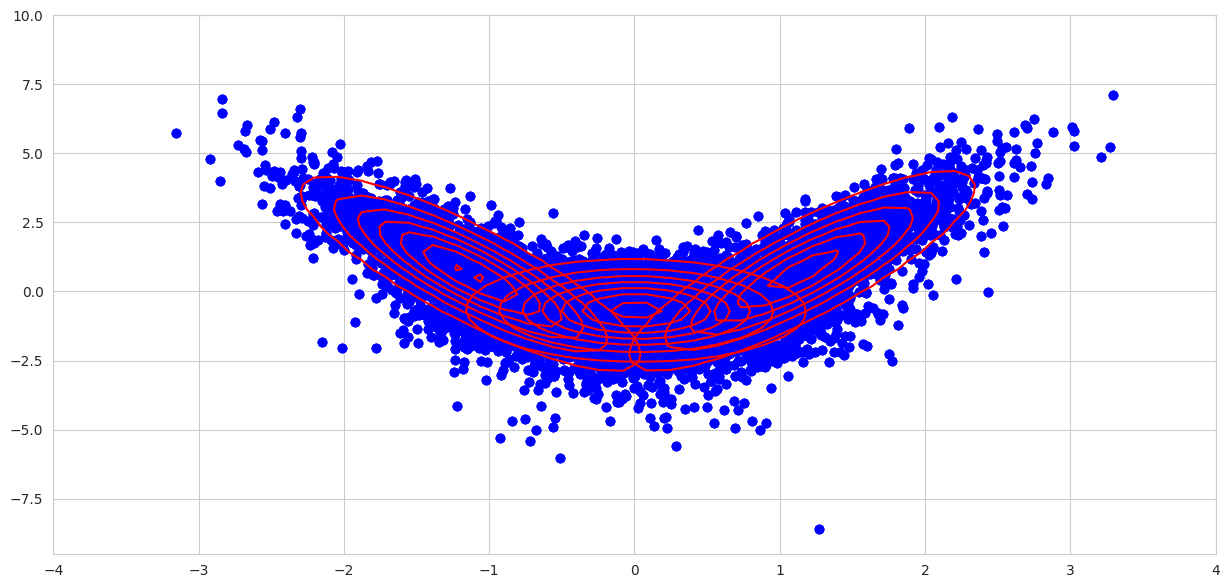

In [192]:
sigma = 1
d=2
b = 1
j = 3
alpha, mu, Sigma = EM_AIS(sigma, n, b, d, j, 50)

samples = sample_gaussian_mixture(j,n,alpha,mu,Sigma)
print("Estimated mean: ", mu)
print("Estimated covariance matrices: ", Sigma)
print("Estimated weights: ", alpha)
plot_gaussian(samples, mu, Sigma, 3)

**Comments**: <font color = 'blue'> We can conclude that the algorithm is working well. This is evidenced by its ability to accurately estimate the parameters of the Gaussian mixture model, which aligns closely with the underlying data distribution